## Why RMSProp

* In adagrad, we penalize the coordinate having high gradient -> dec learning rate. ie the learning rate scheduling is coupled with gradient

* This can be good for convex problems but not for non-convex (DL probs)

* But still we want the co-ord wise adaptivity

* Also, the state increases with square of grad

## RMSProp

* Decouple rate scheduling and co-ord adaptive learning rate

* Can fix the state by using leaky average approach

## Algorithm

$$ s_t = \gamma s_{t-1} + (1 - \gamma)\nabla_t^2 $$

$$ w_t = w_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}} \nabla_t $$

## Implementation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
f = lambda x1, x2 : 0.1*x1**2 + 2*x2**2
gradf = lambda x1, x2 : (0.2*x1, 4*x2)

def rmsprop_calc(x1, x2, s1, s2, eta):
    eps = 1e-06; gamma = 0.9
    (g1, g2) = gradf(x1, x2)
    s1 = gamma*s1 + (1 - gamma)*g1**2
    s2 = gamma*s2 + (1 - gamma)*g2**2
    x1 -= eta/np.sqrt(s1 + eps)* g1
    x2 -= eta/np.sqrt(s2 + eps)* g2
    return x1, x2, s1, s2

def rmsprop_desc(init_val, eta):
    x1, x2 = init_val
    s1, s2 = 0, 0
    results = [(x1, x2)]
    for i in range(200):
        x1, x2, s1, s2 = rmsprop_calc(x1, x2, s1, s2, eta)
        results.append((x1, x2))
    return results

In [17]:
res_low_lr = rmsprop_desc(init_val = [-15, -12], eta = 0.4)
res_high_lr = rmsprop_desc(init_val = [-15, -12], eta = 1)

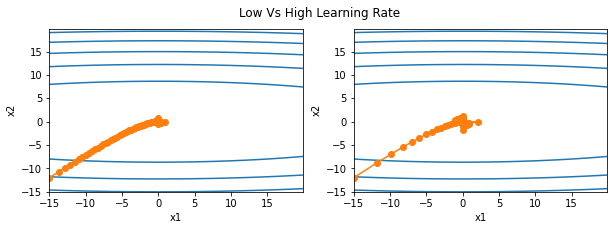

In [18]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("Low Vs High Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        x1, x2 = tf.meshgrid(tf.range(-15, 20.0, 0.1),
                          tf.range(-15.0, 20.0, 0.1))
        plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
        plt.plot(*zip(*result), '-o', color='#ff7f0e')
        plt.xlabel('x1')
        plt.ylabel('x2')

plot_gd_update([res_low_lr, res_high_lr])

## Summary:

RMSProp is very similar to Adagrad insofar as both use the square of the gradient to scale coefficients.

RMSProp shares with momentum the leaky averaging. However, RMSProp uses the technique to adjust the coefficient-wise preconditioner.

The learning rate needs to be scheduled by the experimenter in practice.

The coefficient  γ  determines how long the history is when adjusting the per-coordinate scale.